In [4]:
import tensorflow as tf
from tensorflow import keras

In [70]:
# #from tensorflow.examples.tutorials.fashion_mnist import input_data
# fashion_mnist=keras.datasets.fashion_mnist

In [30]:
from tensorflow.examples.tutorials.mnist import input_data
fashion_mnist = input_data.read_data_sets('data_fashion', source_url='http://fashion-mnist.s3-website.eu-central-1.amazonaws.com/',one_hot=True)

Instructions for updating:
Please use urllib or similar directly.
Successfully downloaded train-images-idx3-ubyte.gz 26421880 bytes.
Extracting data_fashion/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 29515 bytes.
Extracting data_fashion/train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 4422102 bytes.
Extracting data_fashion/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 5148 bytes.
Extracting data_fashion/t10k-labels-idx1-ubyte.gz


In [10]:
def init_wgts(shape):
    init_random_dist=tf.truncated_normal(shape,stddev=0.1)
    return tf.Variable(init_random_dist)

In [11]:
def init_bias(shape):
    init_bias_vals=tf.constant(0.1,shape=shape)
    return tf.Variable(init_bias_vals)

In [12]:
def conv2d(x,W):
    """
    x->[batch,H,W,Channels]
    W->[filter H,Filter W, Channel IN,Channel OUT]
    Use a stride of 1,keep padding same
    """
    return tf.nn.conv2d(x,W,strides=[1,1,1,1],padding='SAME')

In [13]:
def max_pool_2by2(x):
    """
    x->[batch,h,w,channels], a 4d tensor
    """
    return tf.nn.max_pool(x,ksize=[1,2,2,1],strides=[1,2,2,1],padding='SAME')

In [14]:
def convolutional_layer(input_x,shape):
    W=init_wgts(shape)
    b=init_bias([shape[3]])
    return tf.nn.relu(conv2d(input_x,W)+b)

In [15]:
def normal_full_layer(input_layer,size):
    input_size=int(input_layer.get_shape()[1])
    W=init_wgts([input_size,size])
    b=init_bias([size])
    return tf.matmul(input_layer,W)+b

In [16]:
#Placeholder
x=tf.placeholder(tf.float32,shape=[None,784])
y_true=tf.placeholder(tf.float32,shape=[None,10])

In [17]:
x_image=tf.reshape(x,[-1,28,28,1])

In [18]:
#Layer 1
convo_1=convolutional_layer(x_image,shape=[5,5,1,32])
convo_1_pooling=max_pool_2by2(convo_1)
#Layer 2
convo_2=convolutional_layer(convo_1_pooling,shape=[5,5,32,64])
convo_2_pooling=max_pool_2by2(convo_2)
#flatten it out
convo_2_flat=tf.reshape(convo_2_pooling,[-1,7*7*64])
full_layer_one=tf.nn.relu(normal_full_layer(convo_2_flat,1064))

In [19]:
hold_prob=tf.placeholder(tf.float32)
full_one_dropout=tf.nn.dropout(full_layer_one,keep_prob=hold_prob)

In [20]:
y_pred=normal_full_layer(full_one_dropout,10)

In [21]:
cross_entropy=tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(labels=y_true,logits=y_pred))

In [22]:
#optimiser
optimizer=tf.train.AdamOptimizer(learning_rate=0.0001)
train=optimizer.minimize(cross_entropy)

In [23]:
init=tf.global_variables_initializer()

In [24]:
steps=5000

In [34]:
session=tf.Session()
with session as sess:
    sess.run(init)
    for i in range(steps):
        batch_x,batch_y=fashion_mnist.train.next_batch(500)
        sess.run(train,feed_dict={x:batch_x,y_true:batch_y,hold_prob:0.5})
        if i%100==0:
            print("Currently on step{}".format(i))
            print("Accuracy is:")
            matches=tf.equal(tf.argmax(y_pred,1),tf.argmax(y_true,1))
            acc=tf.reduce_mean(tf.cast(matches,tf.float32))
            print(sess.run(acc,feed_dict={x:fashion_mnist.test.images,y_true:fashion_mnist.test.labels,hold_prob:1.0}))
            print('\n')

Currently on step0
Accuracy is:
0.0058


Currently on step100
Accuracy is:
0.7772


Currently on step200
Accuracy is:
0.8233


Currently on step300
Accuracy is:
0.8375


Currently on step400
Accuracy is:
0.8485


Currently on step500
Accuracy is:
0.8531


Currently on step600
Accuracy is:
0.8604


Currently on step700
Accuracy is:
0.8632


Currently on step800
Accuracy is:
0.8665


Currently on step900
Accuracy is:
0.8726


Currently on step1000
Accuracy is:
0.8718


Currently on step1100
Accuracy is:
0.8748


Currently on step1200
Accuracy is:
0.8783


Currently on step1300
Accuracy is:
0.8799


Currently on step1400
Accuracy is:
0.8819


Currently on step1500
Accuracy is:
0.884


Currently on step1600
Accuracy is:
0.8839


Currently on step1700
Accuracy is:
0.8864


Currently on step1800
Accuracy is:
0.8854


Currently on step1900
Accuracy is:
0.8901


Currently on step2000
Accuracy is:
0.8889


Currently on step2100
Accuracy is:
0.8919


Currently on step2200
Accuracy is:
0.8936


C

In [31]:
import matplotlib.pyplot as plt
%matplotlib inline

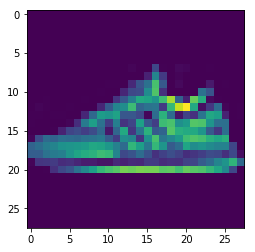

In [32]:
#(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
my_img=fashion_mnist.train.images[567].reshape(28,28)
plt.imshow(my_img)

In [33]:
# plt.figure()
# plt.imshow(train_images[390])
# plt.colorbar()
# plt.grid(False)